![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Questão 1: Bisseção ao infinito

Uma outra forma de encontrar raizes de $x e^x = y$ consiste em fazer uma bisseção "até o infinito".
Vejamos como isso se aplica no caso de $+\infty$.

Como há um número **finito** de números de ponto flutuante que seu computador conhece,
podemos usar uma progressão geométrica para tentar chegar no infinito.

Se no intervalo $[a, a\cdot r]$ a função não trocar de sinal, podemos tentar o intervalo
$[a\cdot r, a\cdot r^2]$, e depois o intervalo $[a\cdot r^2, a\cdot r^3]$ e assim sucessivamente.

## Questão 1.1: PGs ao infinito

Escreva uma função que calcula o comprimento da PG $a r^n$ até chegar no infinito.

In [93]:
def comprimento_pg(a, r):
    """Comprimento da PG de razão  r  começando em  a,  até chegar no +infinito de ponto flutuante"""
    assert a > 0 and r > 1
    a, r = float(a), float(r)
    passo = 0
    pg = r
    while float("inf") != pg*a:
        passo += 1
        pg *= r
    return passo



In [94]:
assert 1000 < comprimento_pg(1, 2.) < 2000

In [95]:
assert 250 < comprimento_pg(1, 10.) < 350

In [96]:
assert 250 < comprimento_pg(1e10, 10.) < 350

## Questão 1.2: Máximo de bisseções

Quantas bisseções é possível fazer em um intervalo $[a,b]$ até chegar no limite de precisão do computador?

In [97]:
def bissect_max(a, b):
    """Conta o número de bisseções no intervalo  [a, b]  até chegar na precisão de representação."""
    nbiss = 0
    distance = abs(a-b)
    counter = 0
    while counter<200:
      counter += 1
      distance/=2 
      if a+distance ==a:
        break
    return counter

In [98]:
assert 50 <= bissect_max(1, 2) <= 56
assert 50 <= bissect_max(1, 4) <= 56

In [99]:
assert bissect_max(1,8) >= bissect_max(1,4)
assert bissect_max(1,8) >= bissect_max(2,8)

In [100]:
assert bissect_max(1,8) >= bissect_max(3,8)

Porque é sempre verdade que `bissect_max(a,b) >= bissect_max(c,d)` se $[c,d] \subset [a,b]$?

Matematicamente, podemos dividir um intervalo infinitas vezes e, assim, o número de bisseções que podem ser feitas entre dois intervalos quaisquer é infinito. Entretando, o computador apresenta um limite de precisão. Assim, quando um intervalo é maior que outros, mais bisseções são feitas até chegar a este limite de precisão, porque podemos dividir mais vezes o intervalo. Como o intervalo $[c, d]$ está contido em $[a, b]$, o número de bisseções feitas em $[c, d]$ só pode ser menor ou igual ao número de bisseções feitas em $[a, b]$ computacionalmente falando.

## Questão 1.3: Calibrando duas bisseções

Qual razão $r$ da PG você usaria para encontrar uma raiz positiva,
levando em conta
- o número de bisseções para encontrar o intervalo; e
- o número de bisseções para encontrar a raiz dentro do intervalo?

Explique sua ideia na caixa abaixo, e faça as contas necessárias na caixa seguinte.

Um "r" muito grande seria vantajoso para encontrar um intervalo com poucas iterações, mas o tamanho do intervalo formado será grande também o que aumentaria o número de iterações necessárias para encontrar a raiz no intervalo. Por outro lado, um "r" pequeno vai necessitar de muitas iterações para encontrar um intervalo que contenha uma raiz, mas, uma vez encontrado, este intervalo provavelmente será menor e vai necessitar de menos iterações para enconrtar a raiz.

Para calibrar esse "r", pensando nesse trade off. Propomos uma solução algorítmica que leva em consideração o pior caso. No pior caso, o intevalo com a raiz será encotrado na última iteração da PG e, portanto, vamos obter o maior intervalo possível para um dado "r". Além disso, o número de bisseções realizado para encontrar a raiz é o maior possível. 

Essa solução algorítmica tem como objetivo encontrar o menor número total de iterações que é definido pela soma entre o número de bisseções para encontrar o intervalo e o número de bisseções para encontrar a raiz no intervalo. É importante observar que a melhor solução neste caso não é necessáriamente a solução em que esses dois números são muito próximos. 

Para o código abaixo vamos testar valores inteiros para "r" pertencentes a uma PG de razão 2. Claro que escolhas diferentes "r" poderiam trazer resultados diferente e até melhores, mas o código abaixo é meramente ilustrativo para o método, trazendo uma estimativa do que seria uma escolha boa para o "r" de acordo com os critérios definidos.

Os resultados do código abaixo indicam que r = 4294967296 é a melhor solução.


In [101]:
def calibracao_r(a):
    best_comp_pg = -1,
    best_num_bissec = -1,
    r = 2
    best_total_iterations = -1
    best_r = 2
    while True:
        r  *= 2
        try:
            com = comprimento_pg(a, r)
            bissec = bissect_max(r**(com - 1), r**(com))
            if best_total_iterations == -1 or best_total_iterations > com + bissec:
                best_total_iterations =  com + bissec
                best_comp_pg = com
                best_num_bissec = bissec
                best_r = r

        except OverflowError:
            print("deu certo")
            return {
                "total": best_total_iterations,
                "r": best_r,
                "comprimento_da_pg": best_comp_pg,
                "numero_bissecoes": best_num_bissec
            }


calibracao_r(1)

deu certo


{'total': 116,
 'r': 4294967296,
 'comprimento_da_pg': 31,
 'numero_bissecoes': 85}

## Questão 1.4: "Fase 0"

Agora, implemente uma função que encontra um intervalo onde há uma raiz de $f(x) = y$,
sabendo que há uma raiz no intervalo $[1, +\infty)$.

In [102]:
def fase0(f, y):
    """Retorna um intervalo onde há uma raiz de  f(x) = y."""
    a = 1
    r = 2
    pg = a
    while float("inf") != pg:
        a = pg
        pg *= r
        if (f(a) - y)*(f(pg) - y) < 0:
            return (a, pg)

In [103]:
def sqr(x):
    return x**2

a, b = fase0(sqr, 10)
assert sqr(a) <= 10 <= sqr(b) or sqr(b) <= 10 <= sqr(a)

In [104]:
def slow_pot(x):
    return x**0.1

a, b = fase0(slow_pot, 10)
assert slow_pot(a) <= 10 <= slow_pot(b) or slow_pot(b) <= 10 <= slow_pot(a)

In [105]:
def cauchy(x):
    return 1/(1 + x**2)

a, b = fase0(cauchy, 1e-10)
assert cauchy(a) <= 1e-10 <= cauchy(b) or cauchy(b) <= 1e-10 <= cauchy(a)

Agora, modifique a `fase0` para receber valores de $a$ e $r$ quaisquer.
Isso permitirá começar a busca tanto para valores positivos como negativos,
e também "no infinito" ou "perto de zero".

In [106]:
def fase0_geral(f, y, a, r):
    """Retorna um intervalo contendo uma raiz de  f(x) = y,  usando a PG de termo inicial  a  e razão  r."""
    assert a != 0
    assert r > 0 and abs(r) != 1
    pg = a
    while float("inf") != pg:
        a = pg
        pg *= r
        if (f(a) - y)*(f(pg) - y) < 0:
            return (a, pg)


Explique os `assert`s iniciais.

Quando "a" = 0 e "r" = 1, a pg não vai ser desenvolvida já que, no primeiro caso, todos os termos da pg serão iguais a zero e, no segundo caso, todos os termos da pg serão iguais a "a". Essa não é a ideia código, precisamos que os termos da pg assumam valores distintos para testar a possibilidade de existência de uma raiz no intervalo. Além disso precisamos que a razão "r" seja positiva, se "r" vou negativo os termos da pg vão oscilar entre valores positivos e negativos. A ideia da função é ou buscar raízes no $-\infty$ ou buscar raízes no $+\infty$, com "r" negativo a pg cresce em direção ao -inf e ao +inf ao mesmo tempo. 

In [107]:
a, b = fase0_geral(sqr, 10, -1, 2)
assert sqr(a) <= 10 <= sqr(b) or sqr(b) <= 10 <= sqr(a)

In [108]:
def xlogx(x):
    return x * np.log(x)

a, b = fase0_geral(xlogx, -1e-20, 0.5, 0.1)
assert xlogx(a) <= -1e-20 <= xlogx(b) or xlogx(b) <= -1e-20 <= xlogx(a)

## Questão 1.5: Bisseção final

Modifique o código da Bisseção para encontrar a raiz de $f(x) = y$, até a precisão do computador,
a partir dos termos de uma PG.

Retorne, também, o número de pontos onde você terá avaliado $f$ - isso vai necessitar alterar a função de fase 0.

In [109]:
def fase0_geral(f, y, a, r):
    """Retorna um intervalo contendo uma raiz de  f(x) = y,  usando a PG de termo inicial  a  e razão  r."""
    assert a != 0
    assert r > 0 and abs(r) != 1
    pg = a
    sinal_a = f(a) - y
    numF = 1
    while float("inf") != pg:
        a = pg
        pg *= r
        numF += 1
        if sinal_a*(f(pg) - y) < 0:
            return (a, pg, numF)
    
def bisseção_PG(f, y, a, r):
    """Solução até a precisão da máquina para  f(x) = y."""
    a, b, numF = fase0_geral(f, y, a, r)

    maxiter = bissect_max(a, b)
    numiter = 0
    fb = f(b) - y
    numF += 1
    while True:
        media  = (a + b)/2
        fmedia = f(media) - y
        numF += 1
        prod = fb * fmedia
        numiter += 1
        if maxiter == numiter:
            return (media, numF)
        elif prod > 0:
            b = media
            fb = fmedia
        elif prod < 0:
            a = media

In [110]:
r, nevals = bisseção_PG(sqr, 1000, 1, 2)
assert abs(sqr(r) - 1000) < 1e-13
assert 50 <= nevals <= 100

In [111]:
r, nevals = bisseção_PG(xlogx, 1000, 1, 3)
assert abs(xlogx(r) - 1000) < 1e-3
assert 50 <= nevals <= 100

In [134]:
def xex(x):
    return x * np.exp(x)

r, nevals = bisseção_PG(xex, -1e-30, -1, 10)
assert abs(xex(r) + 1e-30) < 1e-40
assert 50 <= nevals <= 70

In [113]:
r, nevals = bisseção_PG(xlogx, -1e-20, 0.5, 0.1)
assert abs(xlogx(r) + 1e-20) < 1e-30
assert 50 <= nevals <= 100

Porque a tolerância dos últimos testes é tão pequena?

Isso é feito porque nos dois últimos casos a raiz também é muito pequena. Sem os valores de y colocados, a raiz de ambas as funções seria zero. Entretanto, há um valor de y muito pequeno que transalada a raiz para a esquerda. A resposta, portanto, precisa ser precisa o suficiente para reconhecer essa translação e, para isso, a tolerância deve ser menor que o y utilizado. Em ambos os asserts a tolerância é $10^{10}$ vezes o valor de y; o que permite que o resultado atinja a precisão desejada.

## Questão 1.6: Generalizando ainda mais

Como você adaptaria a busca de um intervalo para encontrar uma raiz de $f(x) = y$ para funções que não são monótonas?

Algumas ideias para pensar:

- $x \cos(x)$
- $x + \sin(x)$

Uma ideia inteligente é achar o mínimo ou o máximo dessas funções, que ocorre quando a derivada delas é igual a zero, e começar a busca pelo intervalo a partir desse ponto. Se a derivada da função for monótona, podemos usar o método já implementado para encontrar as raízes da derivada. Essa ideia faz muito sentido para polinômios. A função $f(x) = x^2 + x$, por exemplo, não é monótona, mas sua derivada $f'(x) = 2x + 1$ é. Podemos facilmente encontrar uma raiz dessa derivada que será o ponto de mínimo da função $f$.

Apesar de ser uma ideia boa, não funciona bem para funções trigonométricas já que as derivadas das funções trigonométricas não são monótonas. Elas possuem, porém, uma propriedade importante que pode ser utilizada: as funções seno e cosseno estão sempre entre 1 e -1. Podemos, então, avaliá-las nesses pontos extremos para verificar a troca de sinal. 

Na função $xcos(x)$, por exemplo, $cos(x) = 1 \therefore x = 2 \pi k$ x e $cos(x) = -1 \therefore x = \pi k$ com k natural. Já encontramos um intervalo de troca de sinal: $[\pi, 2 \pi]$. 

Na função  $x + \sin(x)$, podemos utilizar o mesmo raciocínio, ou seja, encontrar os valores de x que levam $\sin(x)$ a um de seus extremos e aplicar esse valor na função para verificar se há troca de sinal.

# Questão 2: O Método da Secante

Uma variante do método de Newton, que dispensa o uso da derivada,
é o método da secante.

A ideia é simples: em vez de usar a tangente, dada pela derivada $f'(x)$,
o método da secante usa 2 pontos consecutivos $x_0$ e $x_1$ para calcular uma **secante** ao gráfico de $f$,
e com isto determinar uma interseção desta reta com o eixo dos $x$.
Esta interseção é chamada de $x_2$, e o método prossegue construindo $x_3$ a partir de $x_1$ e $x_2$
e assim por diante.

## Questão 2.1: Equações

Dê a equação da reta secante a $f$, passando pelos pontos $x_0$ e $x_1$.

#### Primeiramente precisamos encontrar o coeficiente angular da nossa função, para isso, usaremos alguns exemplos gráficos.

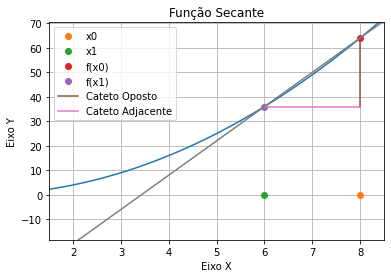

In [114]:
x = np.linspace(0,10,100)

xs = [8,6]
    
ax = plt.gca()
ax.set(xlabel='Eixo X', ylabel='Eixo Y',
       title='Função Secante')
plt.plot(x,x**2) # Função f(x)


plt.plot(xs[0],0, ls="", marker="o", label="x0") # Pontos x0
plt.plot(xs[1],0, ls="", marker="o", label="x1") # Pontos x1 

plt.plot(xs[0],xs[0]**2, ls="", marker="o", label="f(x0)") # f(x0)
plt.plot(xs[1],xs[1]**2, ls="", marker="o", label="f(x1)") # f(x1)

plt.plot([xs[0],xs[0]],[xs[0]**2, xs[1]**2], label="Cateto Oposto") # Cateto Oposto
plt.plot([xs[0],xs[1]],[xs[1]**2, xs[1]**2], label="Cateto Adjacente") # Cateto Adjacente

plt.plot(x,14*x -48) # Função Secante

plt.margins(x=-0.15, y=-0.2) # Zoom no gráfico

plt.legend()
plt.grid()



plt.show()

#### Tendo esses 4 pontos, queremos encontrar a tangente da reta que passa pelos pontos f(x0) e f(x1)

##### Para isso, podemos calcular a tangente usando a trigonometria, pois sabemos que com um triângulo retângulo: 
##### tg(x) = (CatetoOposto)/(CatetoAdjacente)
##### Sabendo que CatetoOposto = f(x0) - f(x1) e CatetoAdjacente = x0 - x1, podemos perceber que a tg(x) = (f(x0) - f(x1))/(x0 - x1)
##### Agora só precisamos achar o coeficiente linear, utilizando a função afim (y = ax + b) e substituindo os valores que temos encontraremos b:
 - y = f(x0); 
 - x = x0; 
 - a = (f(x0) - f(x1))/(x0 - x1);
 
##### f(x0) =  ((f(x0) - f(x1))/(x0 - x1)) * x0 + b
##### b = f(x0) - ((f(x0) - f(x1))/(x0 - x1)) * x0
##### E a equação final fica:
- y = ((f(x0) - f(x1))/(x0 - x1)) * x +  f(x0) - ((f(x0) - f(x1))/(x0 - x1)) * x0
- y = ((f(x0) - f(x1))/(x0 - x1)) * (x - x0) + f(x0)

Deduza a equação do "passo da secante", que a partir $x_0$ e $x_1$ calcula a raiz da secante ao gráfico de $f$.

##### Podemos determinar o "passo da secante" de forma análoga ao método de newton:

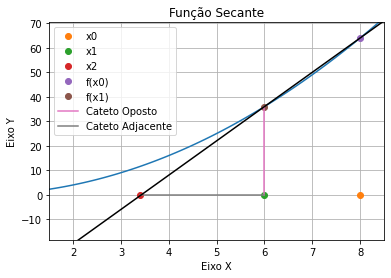

In [115]:
x = np.linspace(0,10,100)

xs = [8,6]
    
ax = plt.gca()
ax.set(xlabel='Eixo X', ylabel='Eixo Y',
       title='Função Secante')

plt.plot(x,x**2) # Função f(x)


plt.plot(xs[0],0, ls="", marker="o", label="x0") # Ponto x0
plt.plot(xs[1],0, ls="", marker="o", label="x1") # Ponto x1
plt.plot(3.4,0, ls="", marker="o", label="x2") # Ponto x2 

plt.plot(xs[0],xs[0]**2, ls="", marker="o", label="f(x0)") # f(x0)
plt.plot(xs[1],xs[1]**2, ls="", marker="o", label="f(x1)") # f(x1)

plt.plot([xs[1],xs[1]],[xs[1]**2, 0], label="Cateto Oposto") # Cateto Oposto
plt.plot([3.4,xs[1]],[0,0], label="Cateto Adjacente") # Cateto Adjacente

plt.plot(x,14*x -48, c='blacK') # Função Secante

plt.margins(x=-0.15, y=-0.2) # Zoom no gráfico

plt.legend()
plt.grid()



plt.show()

##### Como podemos perceber no gráfico, é claro que a distância de "x2" é equivalente a x1 - CatetoAdjacente
##### Então sabendo o valor do CatetoAdjacente, conseguiremos descobrir x2, e assim generalizar o passo:

- CatetoAdjacente = CatetoOposto/tg
- CatetoAdjacente = f(x1)/((f(x0) - f(x1))/(x0 - x1))

##### Logo x2 = x1 - f(x1)/((f(x0) - f(x1))/(x0 - x1))
##### E generalizando o passo, temos que:
- $x_{n+1}$ = $x_{n}$ - f($x_{n}$)/((f($x_{n-1}$) - f($x_{n}$))/($x_{n-1}$ - $x_{n}$))


O método da secante é inspirado no método de Newton.
Explique porque ele também pode entrar em _loop_ infinito.

Pelo mesmo motivo do método de Newton, se escolhermos dois "xs" ruins, podemos acabar com a raiz de nossa reta secante muito longe da nossa verdadeira raiz, e assim o método nunca irá convergir. Por isso, temos que buscar escolher "xs", pertos um do outro, e suficientemente pertos da raiz verdadeira.

## Questão 2.2: Implementação

Escreva o método da secante para encontrar uma raiz de $f$.

Retorne todos os pontos visitados pelo método.

In [116]:
def secante(f, x0, x1, xtol=1e-8, ytol=1e-8, maxiter=100):
    """Encontra uma raiz de  f,  começando pelos pontos  x0 e x1,  pelo método da secante."""
    
    pontos = []
    pontos.append(x0)
    pontos.append(x1)
    for _ in range(maxiter):
        x2 = x1 - f(x1)/((f(x0) - f(x1))/(x0 - x1))
        pontos.append(x2)
        if abs(x2-x1) <= xtol and abs(f(x2)) < ytol:
            pontos.append(x2)
            return pontos
        x0 = x1
        x1 = x2
    return pontos

In [117]:
def f2(x):
    return x**2 - 2

pts = secante(f2, 0, 1)
assert 5 <= len(pts) <= 10
assert abs(f2(pts[-1])) <= 1e-5

In [118]:
def f3(x):
    return x**3 - 3

pts = secante(f3, 0, 1)

assert 8 <= len(pts) <= 12
assert abs(f3(pts[-1])) <= 1e-5

## Questão 2.3: Gráficos

Faça o gráfico da distância (em valor absoluto)
entre os pontos produzidos pelo método da secante e a raiz verdadeira,
para as funções $f2$ e $f3$ acima.

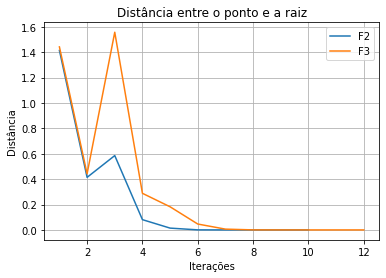

In [119]:
pts_f2 = np.array(secante(f2, 0, 1))
pts_f3 = np.array(secante(f3, 0, 1))


    
ax = plt.gca()
ax.set(xlabel='Iterações', ylabel='Distância',
       title='Distância entre o ponto e a raiz')

plt.plot(np.arange(1,len(pts_f2) + 1),abs(pts_f2 - np.sqrt(2)), label = 'F2')
plt.plot(np.arange(1,len(pts_f3) + 1),abs(pts_f3 - np.cbrt(3)), label = 'F3')
ax.legend()
plt.grid()



plt.show()

In [120]:
assert len(ax.lines) == 2
assert len(ax.get_legend().texts) == 2

De que forma(s) este gráfico parece com o equivalente para o Método de Newton?

É possível perceber que conforme aumentamos o número de iterações, o erro entre os pontos encontrados e a verdadeira raiz diminui. O mesmo ocorre para o Método de Newton.

E assim como o método de Newton, o ponto inicial é relevante para nossa análise. Pela raiz de F3 estar mais longe dos pontos iniciais, ela demorou mais para convergir que F2.

## Questão 2.4: Generalização

Agora, transforme o seu código para encontrar uma raiz de $f(x) = y$.

In [121]:
def secante_inv(f, y, x0, x1, xtol=1e-8, ytol=1e-8, maxiter=100):
    """Encontra uma solução de  f(x) = y,  começando pelos pontos  x0 e x1,  pelo método da secante."""
    def fun(x):
        return f(x) - y
    
    pontos = []
    pontos.append(x0)
    pontos.append(x1)
    for _ in range(maxiter):
        x2 = x1 - fun(x1)/((fun(x0) - fun(x1))/(x0 - x1))
        pontos.append(x2)
        if abs(x2-x1) <= xtol and abs(fun(x2)) < ytol:
            pontos.append(x2)
            return pontos
        x0 = x1
        x1 = x2
    return pontos

In [122]:
pts = secante_inv(sqr, 2, 0, 1)
pts_more = secante_inv(sqr, 2, 0, 1, xtol=1e-15, ytol=1e-15)

assert len(pts) < len(pts_more)
assert abs(pts[-1]**2 - 2) > abs(pts_more[-1]**2 - 2)

Explique porque estes dois testes fazem sentido.

O primeiro teste faz sentido pois, na "pts_more" estamos utilizando os mesmos parâmetros que em "pts", menos em xtol e ytol, onde "pts" usa o padrão da função, e "pts_more" usa xtol e ytol escolhidos, que são menores que o padrão. Assim, precisaremos de mais iterações para garantir que o resultado esteja dentro desse intervalo menor.

O segundo teste faz sentido pois, como estamos utilizando um intervalo maior em "pts" para xtol, estamos encontrando uma raiz menos precisa, e assim mais longe da raiz verdadeira, neste caso 2. Por isso temos que a distância entre "pts" e a raiz verdadeira é maior que a distância entre "pts_raiz" e a raiz verdadeira.

In [123]:
assert len(pts_more) == len(pts) + 1

Explique porque este teste mostra a velocidade do método da secante.

Percebemos com esse teste que mesmo reduzindo pela metade o valor de xtol e ytol, exigindo assim uma raiz bem mais precisa da fórmula, conseguimos encontrar uma raiz nesse intervalo com uma iteração a mais somente.

## Questão 2.5: Mais gráficos!

Para vários valores de $y$, faça em um mesmo eixo o gráfico da distância até a raiz
para o método da secante resolver $x^2 = y$, começando de $(0, 1)$.

Em particular, encontre valores de $y$ que façam que o método da secante demore (bem) mais do que para $y = 2$.

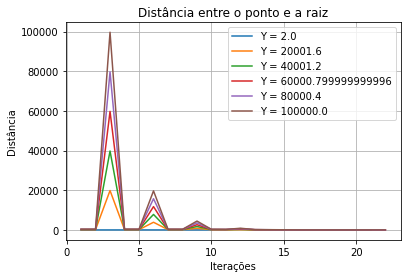

In [124]:
for y in np.linspace(2,1e5,6):
    pts = np.array(secante_inv(sqr, y, 0, 1))
    plt.plot(np.arange(1,len(pts) + 1),abs(pts - (np.sqrt(y)) ), label = "Y = " + str(y))



    
ax = plt.gca()
ax.set(xlabel='Iterações', ylabel='Distância',
       title='Distância entre o ponto e a raiz')


ax.legend()
plt.grid()



plt.show()

In [125]:
assert len(ax.lines) >= 5

In [126]:
assert len(ax.get_legend().texts) >= 5

In [127]:
xmax = max(max(l.get_xdata()) for l in ax.lines)
assert xmax >= 18

Explique o comportamento que observado.

É possível perceber 2 comportamentos claros:

- Os padrões dos "espinhos" nos gráficos, com eles é possível perceber que com algumas quantidades de iterações específicas a função se perde por um instante e fica bem longe da raiz.

- Quanto maior o y escolhido, mas iterações são precisas para conseguir fazer o algoritmo convergir.

## Questão 2.6: Bugs finais

Observe o código abaixo:

In [128]:
secante_inv(xex, 100, 0, 1)

[0,
 1,
 36.787944117144285,
 1.000000000000007,
 1.000000000000017,
 18.100302022341182,
 1.0000012661580193,
 1.0000025323158366,
 18.89392108740228,
 1.0000031062853978,
 1.0000036802549213,
 18.89388095053892,
 1.0000042542473793,
 1.0000048282397986,
 18.89385016440335,
 1.0000054022498013,
 1.000005976259766,
 18.893819383387896,
 1.00000655028731,
 1.0000071243148176,
 18.893788535145468,
 1.0000076983599442,
 1.0000082724050339,
 18.893757759439914,
 1.0000088464677042,
 1.000009420530335,
 18.89372685289377,
 1.0000099946106182,
 1.0000105686908654,
 18.89369609477266,
 1.0000111427886793,
 1.0000117168864584,
 18.893665234352174,
 1.000012291001866,
 1.0000128651172362,
 18.893634424491523,
 1.0000134392502034,
 1.0000140133831363,
 18.89360363386469,
 1.0000145875336592,
 1.0000151616841444,
 18.89357283891506,
 1.0000157358522195,
 1.0000163100202597,
 18.893542054454745,
 1.0000168842058876,
 1.0000174583914776,
 18.893511187370322,
 1.0000180325947063,
 1.000018606797894,

Porquê o método da secante terminou longe demais de uma raiz?

O método terminou longe pois ele caiu em um loop, ficando preso em um ciclo. E isso ocorreu por escolhermos um y grande, isso fez com que a raiz se afastasse dos 2 pontos iniciais. Fazendo a análise pra y menores, veremos que quanto maior Y, maior o número de pontos encontrados, e quando encontramos 102 (100 do maxiter + 2 pontos iniciais) pontos, sabemos que o algoritmo entrou em loop.

In [129]:
for y in range(0,101,10):
    print("Y = " + str(y) + " encontrou " + str(len(secante_inv(xex, y, 0, 1))) + " pontos")

Y = 0 encontrou 5 pontos
Y = 10 encontrou 14 pontos
Y = 20 encontrou 18 pontos
Y = 30 encontrou 24 pontos
Y = 40 encontrou 38 pontos
Y = 50 encontrou 81 pontos
Y = 60 encontrou 102 pontos
Y = 70 encontrou 102 pontos
Y = 80 encontrou 102 pontos
Y = 90 encontrou 102 pontos
Y = 100 encontrou 102 pontos


O que poderia ser feito para evitar este tipo de situação?

Se botarmos um maxiter maior uma hora o algoritmo irá convergir, e isto seria uma solução para este tipo de problema. Podemos mostrar isso com um teste rápido, vendo o último valor que a função encontrou com um maxiter muito grande:

In [130]:
secante_inv(xex, 100, 0, 1, maxiter = 1000000)[-1]

3.38563014029005

Como podemos ver, um número extremamente próximo da raiz;